In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [3]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

It's binary classification problem with imbalanced classes.

What is the average of the accuracy scores obtained by performing a 10-fold cross-validation?

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy_clf = DummyClassifier(strategy='most_frequent')

result = cross_val_score(dummy_clf, data, target, cv=10)

print(f'Average score: {result.mean():.2f} +-{result.std():.2f}')

Average score: 0.76 +-0.00


Compute the balanced accuracy instead of the accuracy score.

In [5]:
result = cross_val_score(dummy_clf, data, target,
                         cv=10, scoring='balanced_accuracy')

print(f'Average balanced accuracy: {result.mean():.2f} +-{result.std():.2f}')

Average balanced accuracy: 0.50 +-0.00


What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
model = KNeighborsClassifier()

result = make_pipeline(scaler, model)

result.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

Compare the average of the train and test scores.

In [7]:
from sklearn.model_selection import cross_validate
scaler = StandardScaler()
model = KNeighborsClassifier(n_neighbors=1)

result = cross_validate(make_pipeline(scaler, model),
                         data, target, 
                         cv=10, scoring='balanced_accuracy',
                         return_train_score=True)
                        


In [8]:
print(f"Train score: {result['train_score'].mean():.2f} +-{result['train_score'].std():.2f}")
print(f"Test score: {result['test_score'].mean():.2f} +-{result['test_score'].std():.2f}")

Train score: 0.88 +-0.01
Test score: 0.48 +-0.11


Plot the average train and test scores for the different value of the n_neuighbors hyperparameter.

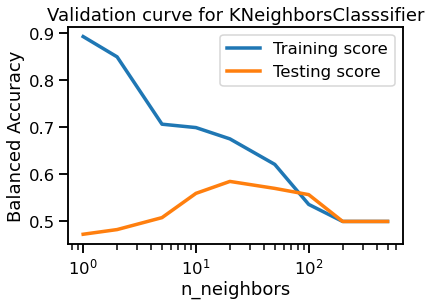

In [9]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

param = 'n_neighbors'
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                         scaled_data, target, 
                         param_name=param, param_range=param_range,
                         scoring='balanced_accuracy', cv=5)

plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Testing score')
plt.legend()

plt.xscale('log')
plt.xlabel('n_neighbors')
plt.ylabel('Balanced Accuracy')
_ = plt.title('Validation curve for KNeighborsClasssifier')

The model overfits for the range of values from 1 to 10.  
The model underfits for the range of values from 100 to 500.  
The model best generalizes for the range of values from 10 to 100.